In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# IQ

In [2]:
df_iq = pd.read_csv("IQ.csv")

In [4]:
df_iq.sample(20)

,IQ
173,133.03
709,110.37
210,101.12
962,94.42
844,99.07
887,103.52
596,99.93
679,93.89
40,109.32
710,78.67


In [6]:
np.percentile(df_iq["IQ"], 80)

111.692

In [9]:
df_iq["IQ"].mean()

99.73802

<AxesSubplot:>

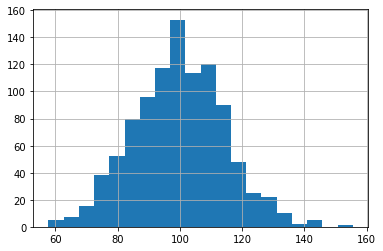

In [8]:
df_iq["IQ"].hist(bins=20)

# Height- Weight

In [13]:
df_wh = pd.read_csv("weight-height.csv")
heights = df_wh["Height"]

In [11]:
df_wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
df_wh.shape

(10000, 3)

In [200]:
sample_mean = heights.mean()
print(sample_mean)

66.36755975482124


In [197]:
size = 1000
bootstrap_size = int(1.3*len(heights))
bootstrapped_means = np.empty(size)
for i in range(size):
    bootstrapped_sample = heights.sample(bootstrap_size, replace=True)
    x_bar = np.mean(bootstrapped_sample) # Sample mean; Replace by median/percentile
    bootstrapped_means[i] = x_bar

In [201]:
bootstrapped_means

array([66.3749276 , 66.33117028, 66.35919471, 66.34354479, 66.39550691,
       66.38585404, 66.37624428, 66.37387171, 66.33645383, 66.36020761,
       66.37885023, 66.33994946, 66.35634745, 66.42969747, 66.38050434,
       66.33178847, 66.33540315, 66.38109806, 66.42173021, 66.35485059,
       66.38084808, 66.33518876, 66.3334826 , 66.42522365, 66.36509604,
       66.41214884, 66.33394298, 66.42321459, 66.35357846, 66.33205614,
       66.35869163, 66.35958234, 66.380156  , 66.38938087, 66.31240322,
       66.36009753, 66.31961258, 66.41244522, 66.42392814, 66.33704017,
       66.3025768 , 66.29406982, 66.45253095, 66.40634737, 66.31094496,
       66.33314175, 66.37449403, 66.41519247, 66.31424667, 66.37214265,
       66.3700594 , 66.40583234, 66.34859484, 66.42347294, 66.32347992,
       66.3726125 , 66.32714488, 66.39380733, 66.32210252, 66.36276784,
       66.36935237, 66.36526249, 66.35423104, 66.40530627, 66.44528241,
       66.35878153, 66.34967264, 66.44156265, 66.33114003, 66.34

In [198]:
confidence_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
print(confidence_interval)
length = confidence_interval[1] - confidence_interval[0]
print(length)

[66.3039306  66.42833896]
0.1244083605058961


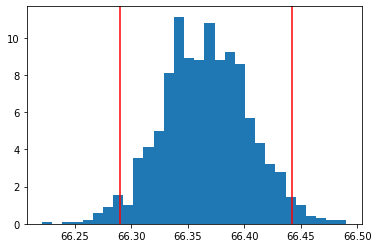

In [97]:
plt.hist(bootstrapped_means, bins=30, density=True)
plt.axvline(x=confidence_interval[0], c="r")
plt.axvline(x=confidence_interval[1], c="r")
plt.show()

In [84]:
heights.sample(len(heights), replace=True).nunique()

6376

In [72]:
heights.sample(len(heights), replace=False).value_counts()

63.716692    1
63.669113    1
67.449273    1
68.985554    1
66.559796    1
            ..
71.330554    1
66.635115    1
73.815386    1
68.763464    1
61.035490    1
Name: Height, Length: 10000, dtype: int64

# Hypothesis testing

In [186]:
num_tosses = 10
num_heads = 7
num_people = 100000

count_extremes = 0
for i in range(num_people):
    # tosses is a sequence of 0's and 1's, num_tosses number of elements
    tosses = np.random.choice([0, 1], size=num_tosses)
    sum_tosses = np.sum(tosses) # 1--> heads. Sum gives number of heads
    if sum_tosses >= num_heads:
        count_extremes += 1
p_value = count_extremes / num_people
print(p_value)

0.17217
